In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
from plot_utils import cool_savefig

In [3]:
small_batches = np.zeros((2,1500*500))
medium_batches = np.zeros((2,30*500))
large_batches = np.zeros((2,500))

In [4]:
from glob import glob

filenames = sorted(list(glob('concentration_estimates/*.npz')))
len(filenames)

500

In [5]:
for sim_num in range(500):
    npzfile = np.load(filenames[sim_num])
    
    small_batches[:,sim_num*1500:(sim_num+1)*1500] = npzfile['small_batches']
    medium_batches[:,sim_num*30:(sim_num+1)*30] = npzfile['medium_batches']
    large_batches[:,sim_num] = npzfile['whole_sim']

In [6]:
small_batches_densities = small_batches[0,:]
small_batches_compositions = small_batches[1,:]

medium_batches_densities = medium_batches[0,:]
medium_batches_compositions = medium_batches[1,:]

large_batches_densities = large_batches[0,:]
large_batches_compositions = large_batches[1,:]

In [7]:
print(np.mean(small_batches_densities < np.inf))
print(np.mean(small_batches_compositions < np.inf))

print(np.mean(medium_batches_densities < np.inf))
print(np.mean(medium_batches_compositions < np.inf))

print(np.mean(large_batches_densities < np.inf))
print(np.mean(large_batches_compositions < np.inf))

0.4949653333333333
1.0
0.5013333333333333
1.0
0.506
1.0


In [8]:
def small_part(array, x): return array[array < x]
def finite_part(array): return small_part(array, np.inf)

In [9]:
from statsmodels.distributions.empirical_distribution import ECDF

In [10]:
def x_fmt(x, pos):
    return '$10^{}$'.format(x).replace('.0','').replace('.5', '')

In [11]:
def crest(index):
    return sns.color_palette("crest")[index]

def magma(index):
    return sns.color_palette("magma")[index]

In [12]:
small_ecdf = ECDF(small_batches_densities)
medium_ecdf = ECDF(medium_batches_densities)
large_ecdf = ECDF(large_batches_densities)

# Density Heterogeneity

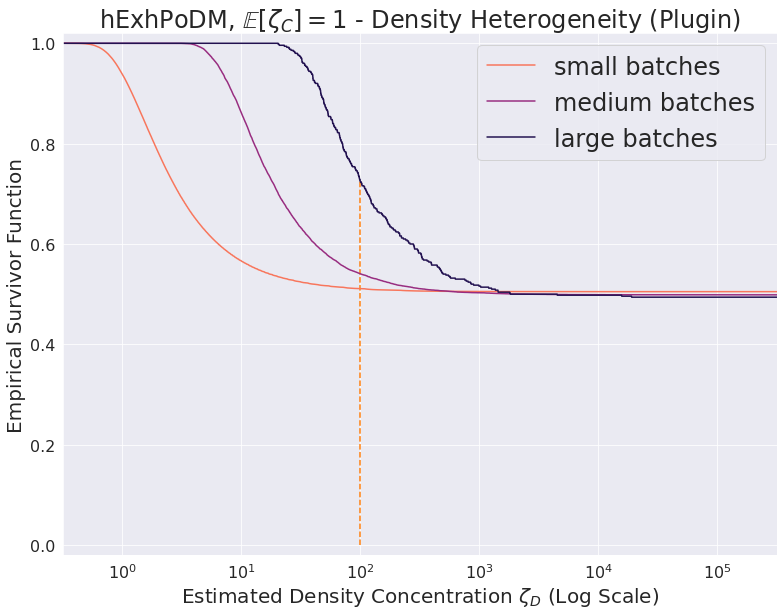

In [13]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8,9.6))
    xvals = np.logspace(start=-0.5, stop=5.5, num=10000)
    axis = sns.lineplot(x=np.log(xvals)/np.log(10), y=1.-small_ecdf(xvals), color=magma(4))
    sns.lineplot(x=np.log(xvals)/np.log(10), y=1.-medium_ecdf(xvals), color=magma(2))
    sns.lineplot(x=np.log(xvals)/np.log(10), y=1. - large_ecdf(xvals), color=magma(0))
    axis.legend(labels=["small batches", "medium batches", "large batches"], fontsize=24)
    axis.set_ylabel('Empirical Survivor Function', fontsize=20)
    axis.set_ylim((-0.02,1.02))
    plt.stem([2], [1.-large_ecdf(100)], markerfmt='', linefmt='C1--')
    axis.set_xlim((-0.5,5.5))
    axis.set_xlabel('Estimated Density Concentration $\zeta_D$ (Log Scale)', fontsize=20)
    axis.tick_params(labelsize=16)
    title = 'hExhPoDM, $\mathbb{E}[\zeta_C]=1$ - Density Heterogeneity (Plugin)'
    plt.title(title, fontsize=24)
    axis.xaxis.set_major_formatter(mtick.FuncFormatter(x_fmt))
    cool_savefig(title + ' survival')

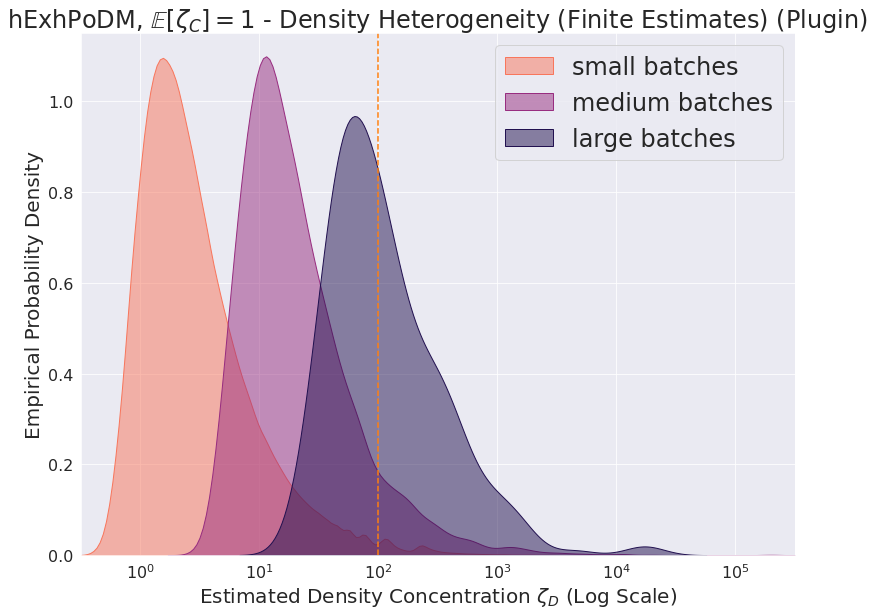

In [14]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8, 9.6))
    axis = sns.kdeplot(np.log(finite_part(small_batches_densities))/np.log(10), color=magma(4), fill=True, alpha=0.5)
    sns.kdeplot(np.log(finite_part(medium_batches_densities))/np.log(10), ax=axis, color=magma(2), fill=True, alpha=0.5)
    sns.kdeplot(np.log(finite_part(large_batches_densities))/np.log(10), ax=axis, color=magma(0), fill=True, alpha=0.5)
    axis.legend(labels=["small batches", "medium batches", "large batches"], fontsize=24)
    axis.xaxis.set_major_formatter(mtick.FuncFormatter(x_fmt))
    axis.set_ylabel('Empirical Probability Density', fontsize=20)
    axis.set_xlabel('Estimated Density Concentration $\zeta_D$ (Log Scale)', fontsize=20)
    axis.tick_params(labelsize=16)
    axis.set_xlim((-0.5,5.5))
    axis.set_ylim((0,1.15))
    plt.stem([2], [1.2], markerfmt='', linefmt='C1--')
    title = 'hExhPoDM, $\mathbb{E}[\zeta_C]=1$ - Density Heterogeneity (Finite Estimates) (Plugin)'
    plt.title(title, fontsize=24)
    cool_savefig(title + ' kde')

that about exactly 50% of the density concentration estimators report infinity (so about 50/50 under vs over dispersion, which had been what I was expecting initially, since you know that's randomness centered around 0), and that of those that report a finite value have an extremely long tail, seems like a good sign for its accuracy. But it does not make for things which are visually compelling/clear visually via histograms

the survival function is not perfect but I do think it is essentially getting there in terms of quality of visualization

# Compositional Heterogeneity

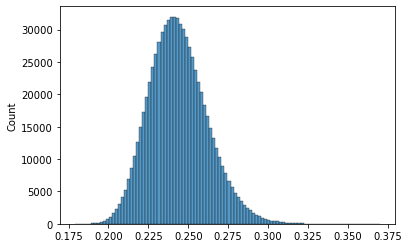

In [15]:
axis = sns.histplot(small_part(small_batches_compositions,3), bins=100)


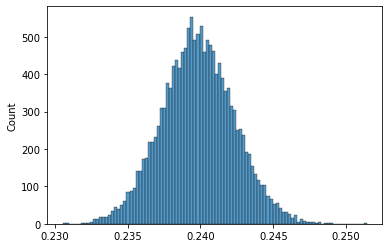

In [16]:
axis = sns.histplot(medium_batches_compositions, bins=100)

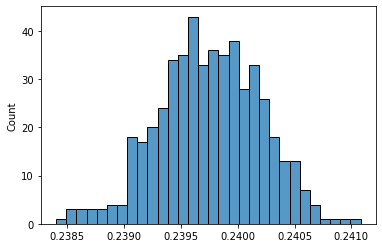

In [17]:
axis = sns.histplot(large_batches_compositions, bins=30)

<AxesSubplot:ylabel='Density'>

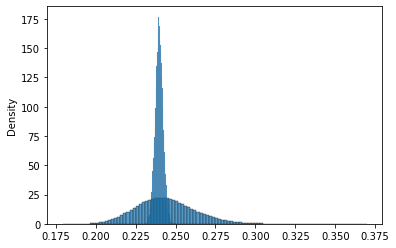

In [18]:
axis = sns.histplot(small_part(small_batches_compositions,3), bins=100, stat="density")
sns.histplot(medium_batches_compositions, bins=100, ax=axis, stat="density")

<AxesSubplot:ylabel='Density'>

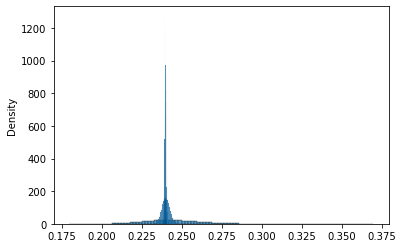

In [19]:
axis = sns.histplot(small_part(small_batches_compositions,3), bins=100, stat="density")
sns.histplot(medium_batches_compositions, bins=100, ax=axis, stat="density")
sns.histplot(large_batches_compositions, bins=100, ax=axis, stat="density")

<AxesSubplot:ylabel='Density'>

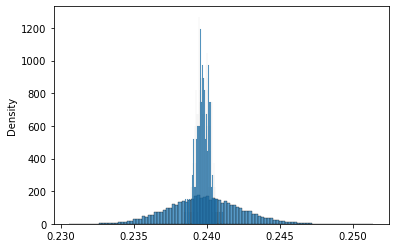

In [20]:
axis = sns.histplot(medium_batches_compositions, bins=100, stat="density")
sns.histplot(large_batches_compositions, bins=100, ax=axis, stat="density")

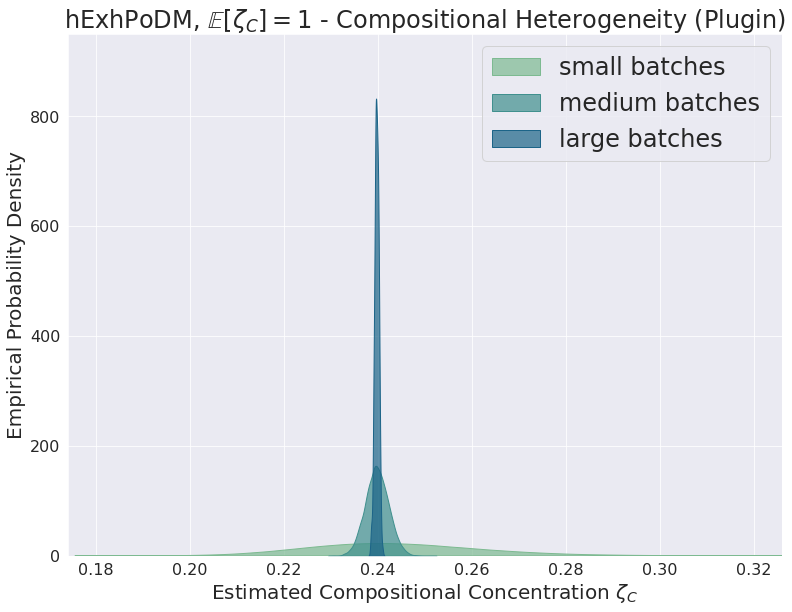

In [21]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8,9.6))
    axis = sns.kdeplot(small_part(small_batches_compositions,3), fill=True, color=crest(0), alpha=0.7)
    sns.kdeplot(medium_batches_compositions, ax=axis, fill=True, color=crest(2), alpha=0.7)
    sns.kdeplot(large_batches_compositions, ax=axis, fill=True, color=crest(4), alpha=0.7)
    axis.legend(labels=["small batches", "medium batches", "large batches"], fontsize=24)
    axis.set_ylabel('Empirical Probability Density', fontsize=20)
    axis.set_xlabel('Estimated Compositional Concentration $\zeta_C$', fontsize=20)
    axis.tick_params(labelsize=16)
    axis.set_xlim((0.174,0.326))
    axis.set_ylim((0,950))
    title = 'hExhPoDM, $\mathbb{E}[\zeta_C]=1$ - Compositional Heterogeneity (Plugin)'
    plt.title(title, fontsize=24)
    cool_savefig(title)

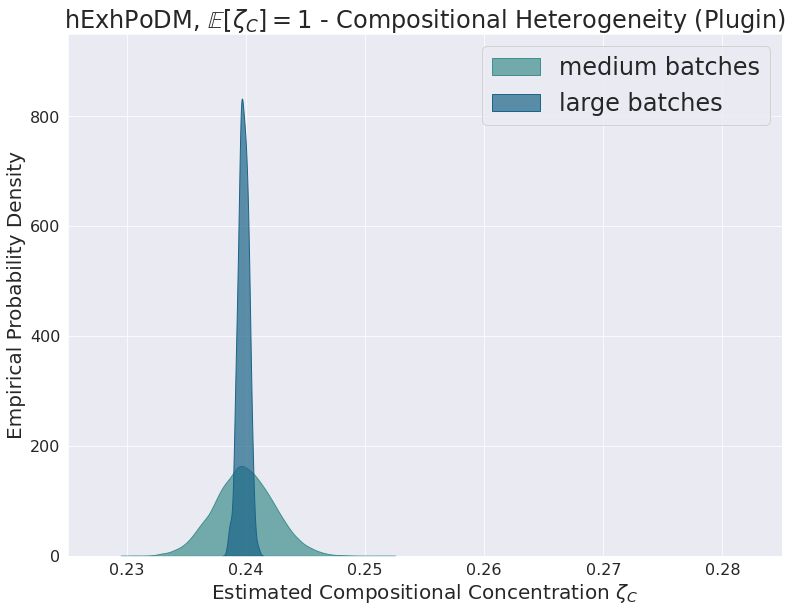

In [22]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8,9.6))
    axis = sns.kdeplot(medium_batches_compositions, fill=True, color=crest(2), alpha=0.7)
    sns.kdeplot(large_batches_compositions, ax=axis, fill=True, color=crest(4), alpha=0.7)
    axis.legend(labels=["medium batches", "large batches"], fontsize=24)
    axis.set_ylabel('Empirical Probability Density', fontsize=20)
    axis.set_xlabel('Estimated Compositional Concentration $\zeta_C$', fontsize=20)
    axis.tick_params(labelsize=16)
    axis.set_xlim((0.225,0.285))
    axis.set_ylim((0,950))
    title = 'hExhPoDM, $\mathbb{E}[\zeta_C]=1$ - Compositional Heterogeneity (Plugin)'
    plt.title(title, fontsize=24)
    cool_savefig(title + ' zoom')

so this is interesting -- the Exponential prior appears to almost have the same effect as using $HPoDM$ but with $\zeta \approx 0.24$. I mean we could tell from the $\chi^2$ plots that the "effective heterogeneity" was clearly greater, but it still seems to be a good sign to me that these plots are able to validate that, that these estimators are able to validate that, and that they converge to a number. Wouldn't call them consistent without knowing what they are converging to (otherwise you can't say what estimand it is consistent for) but

I mean qualitatively this is clearly the correct result right. and also validating that this plug-in estimator based on a parametric distribution (i.e. for the compositional heterogeneity) still produces qualitatively sensible results under model misspecification -- I like that.

also I wonder if the effective $\zeta$ will prove the same for the HEHNBDM or not -- I would imagine not given that it seemed to be even more heterogeneous, but maybe that will be reflected in its effective density $\zeta$ also being lower, but you know also $\approx .24$. we will see very soon

not sure where $\zeta \approx 0.24$ comes from -- the median is only $\ln(2) \approx .69$. but I guess the fact that the effective $\zeta$ is really _so_ much lower still does make sense inasmuch as the $\chi^2$ plots showed this being very diverged even from $\zeta=1$, which would expect to be _less_ so for a larger "effective $\zeta$" of about $0.7$. but you know of course these are all gut guesses and stuff

what might _also_ be interesting is to compute $\chi^2$ divergence values for this from the HPoDM distribution with $\zeta = 0.24$, to see how well. but yeah that requires me computing those expected counts and adding more sections to the paper and it would be off-topic and it's not happening, like I might still do it for fun, but it would go at best in an appendix section, it's not part of the narrative for sure, and honestly I will probably be lazy and not do it

someone else can do it if they want to do a follow-up or whatever